C:\Users\Admin\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


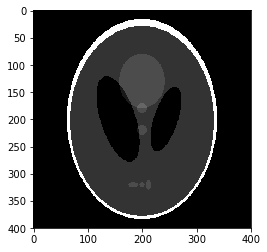

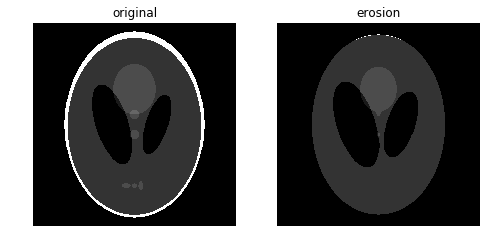

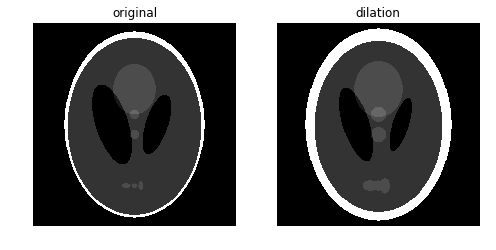

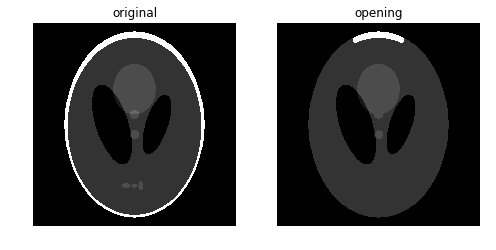

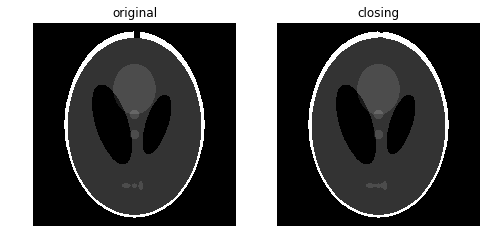

In [6]:
import os
import matplotlib.pyplot as plt
from skimage.data import data_dir
from skimage.util import img_as_ubyte
from skimage import io
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk

orig_phantom = img_as_ubyte(io.imread(os.path.join(data_dir, "phantom.png"),
                                      as_grey=True))
fig, ax = plt.subplots()
ax.imshow(orig_phantom, cmap=plt.cm.gray)
    
selem = disk(6)
eroded = erosion(orig_phantom, selem)
plot_comparison(orig_phantom, eroded, 'erosion')
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax1.set_adjustable('box-forced')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    ax2.set_adjustable('box-forced')
dilated = dilation(orig_phantom, selem)
plot_comparison(orig_phantom, dilated, 'dilation') 
opened = opening(orig_phantom, selem)
plot_comparison(orig_phantom, opened, 'opening')
phantom = orig_phantom.copy()
phantom[10:30, 200:210] = 0

closed = closing(phantom, selem)
plot_comparison(phantom, closed, 'closing')

plt.show()
